Data prepared successfully!

Error rates calculated for k=1 to 40.


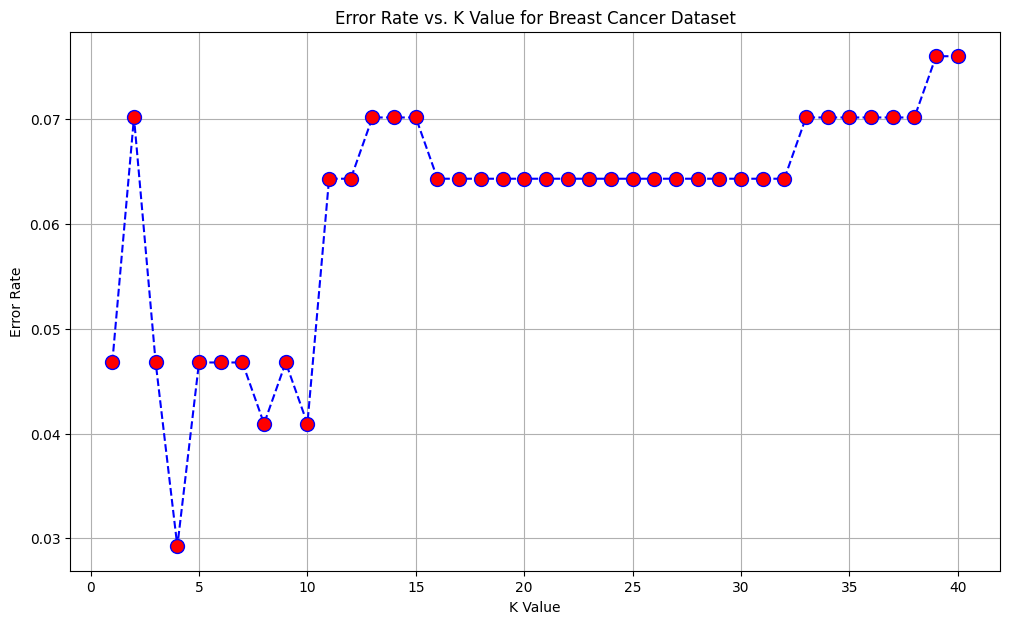


Final model trained with optimal k=7.

--- ผลลัพธ์สำหรับ k=7 (Optimal) ---

Confusion Matrix:
[[ 60   6]
 [  2 103]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        66
      benign       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


--- สำหรับการเปรียบเทียบ: ผลลัพธ์เดิมสำหรับ k=1 ---
              precision    recall  f1-score   support

   malignant       0.95      0.92      0.94        66
      benign       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [1]:
# ---------------------------------------------------
# ส่วนที่ 1: Import Libraries และเตรียมข้อมูล (จาก Workshop 1)
# ---------------------------------------------------
# โค้ดส่วนนี้จะเหมือนกับในเฉลย Workshop 1 เพื่อให้ข้อมูลพร้อมใช้งาน
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# โหลดและเตรียมข้อมูล
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=101
)
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

print("Data prepared successfully!")

# ---------------------------------------------------
# ส่วนที่ 2: การหาค่า k ที่เหมาะสมที่สุดด้วย Elbow Method
# ---------------------------------------------------

# 2.1 คำนวณ Error Rate สำหรับค่า k ต่างๆ
error_rate_c = []

# วนลูปเพื่อทดลองค่า k ตั้งแต่ 1 ถึง 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_c_scaled, y_train_c)
    pred_i = knn.predict(X_test_c_scaled)
    error_rate_c.append(np.mean(pred_i != y_test_c))

print("\nError rates calculated for k=1 to 40.")

# 2.2 พล็อตกราฟ Elbow Method
plt.figure(figsize=(12, 7))
plt.plot(range(1, 41), error_rate_c, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value for Breast Cancer Dataset')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


# ---------------------------------------------------
# ส่วนที่ 3: เฉลย Challenge - สร้างและประเมินผลโมเดลด้วยค่า k ที่ดีที่สุด
# ---------------------------------------------------

# จากกราฟ จะเห็นว่า Error Rate ค่อนข้างต่ำและคงที่ในช่วง k=5 ถึง k=9
# เราจะเลือกค่า k ที่อยู่ในช่วงนี้และเป็นเลขคี่ เช่น k=7

# 3.1 สร้างโมเดลสุดท้ายด้วยค่า k ที่เลือก
OPTIMAL_K = 7
final_knn_model = KNeighborsClassifier(n_neighbors=OPTIMAL_K)

# 3.2 ฝึกฝนโมเดลสุดท้าย
final_knn_model.fit(X_train_c_scaled, y_train_c)
print(f"\nFinal model trained with optimal k={OPTIMAL_K}.")

# 3.3 ทำนายผลด้วยโมเดลสุดท้าย
final_predictions = final_knn_model.predict(X_test_c_scaled)

# 3.4 ประเมินผลโมเดลสุดท้ายและเปรียบเทียบ
print(f"\n--- ผลลัพธ์สำหรับ k={OPTIMAL_K} (Optimal) ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_c, final_predictions))
print("\nClassification Report:")
print(classification_report(y_test_c, final_predictions, target_names=cancer.target_names))

print("\n--- สำหรับการเปรียบเทียบ: ผลลัพธ์เดิมสำหรับ k=1 ---")
# สร้างโมเดล k=1 อีกครั้งเพื่อเปรียบเทียบ
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X_train_c_scaled, y_train_c)
predictions_k1 = knn_k1.predict(X_test_c_scaled)
print(classification_report(y_test_c, predictions_k1, target_names=cancer.target_names))


In [ ]:
# จุดข้อศอก (Elbow Point): จากกราฟจะเห็นว่า Error Rate ลดลงอย่างรวดเร็วจนถึงประมาณ k=5 หรือ k=7 หลังจากนั้นค่า Error Rate ค่อนข้างคงที่หรือลดลงน้อยมาก ดังนั้นค่า k ที่เหมาะสมอาจจะเป็นค่าใดค่าหนึ่งในช่วงนี้

# ผลกระทบของ k ที่สูงเกินไป: การเลือกค่า k ที่สูงเกินไป (เช่น k > 20) ทำให้ Error Rate เริ่มสูงขึ้นอีกครั้ง ปรากฏการณ์นี้เรียกว่า Underfitting ซึ่งโมเดลจะเรียบง่ายเกินไปจนไม่สามารถจับรูปแบบที่ซับซ้อนของข้อมูลได้ดีพอ

# Challenge (ตัวอย่างคำตอบเมื่อเลือก k=7):

# เมื่อสร้างโมเดลด้วย k=7 และประเมินผล จะพบว่า recall ของคลาส malignant อาจจะสูงขึ้นกว่าตอนใช้ k=1 และจำนวน False Negatives (เคสที่อันตราย) อาจลดลง ซึ่งหมายความว่าโมเดลมีความสามารถในการ "ตรวจจับ" ผู้ป่วยที่เป็นโรคได้ดีขึ้น แม้ว่า Accuracy โดยรวมอาจจะเปลี่ยนแปลงเล็กน้อยก็ตาม